Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
!pip install tensorflow

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2025-03-18 10:15:27.974461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [56]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/test2/Skin_cancerImagingCollaboration/Train/")
data_dir_test = pathlib.Path('/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/test2/Skin_cancerImagingCollaboration/Test/')

In [58]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [62]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [65]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),  # Resize images to the specified size
    batch_size=batch_size,
    validation_split = 0.2,
    subset='training',
    label_mode='int',  # Choose 'int' for integer labels or 'categorical' for one-hot encoding
    shuffle=True,  # Shuffle the dataset
    seed=123,  # Set the seed for reproducibility
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [67]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),  # Resize images to the specified size
    batch_size=batch_size,
    validation_split = 0.2,
    subset='validation',
    label_mode='int',  # Choose 'int' for integer labels or 'categorical' for one-hot encoding
    shuffle=True,  # Shuffle the dataset
    seed=123,  # Set the seed for reproducibility
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [69]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_dataset.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

2025-03-18 16:48:31.411485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


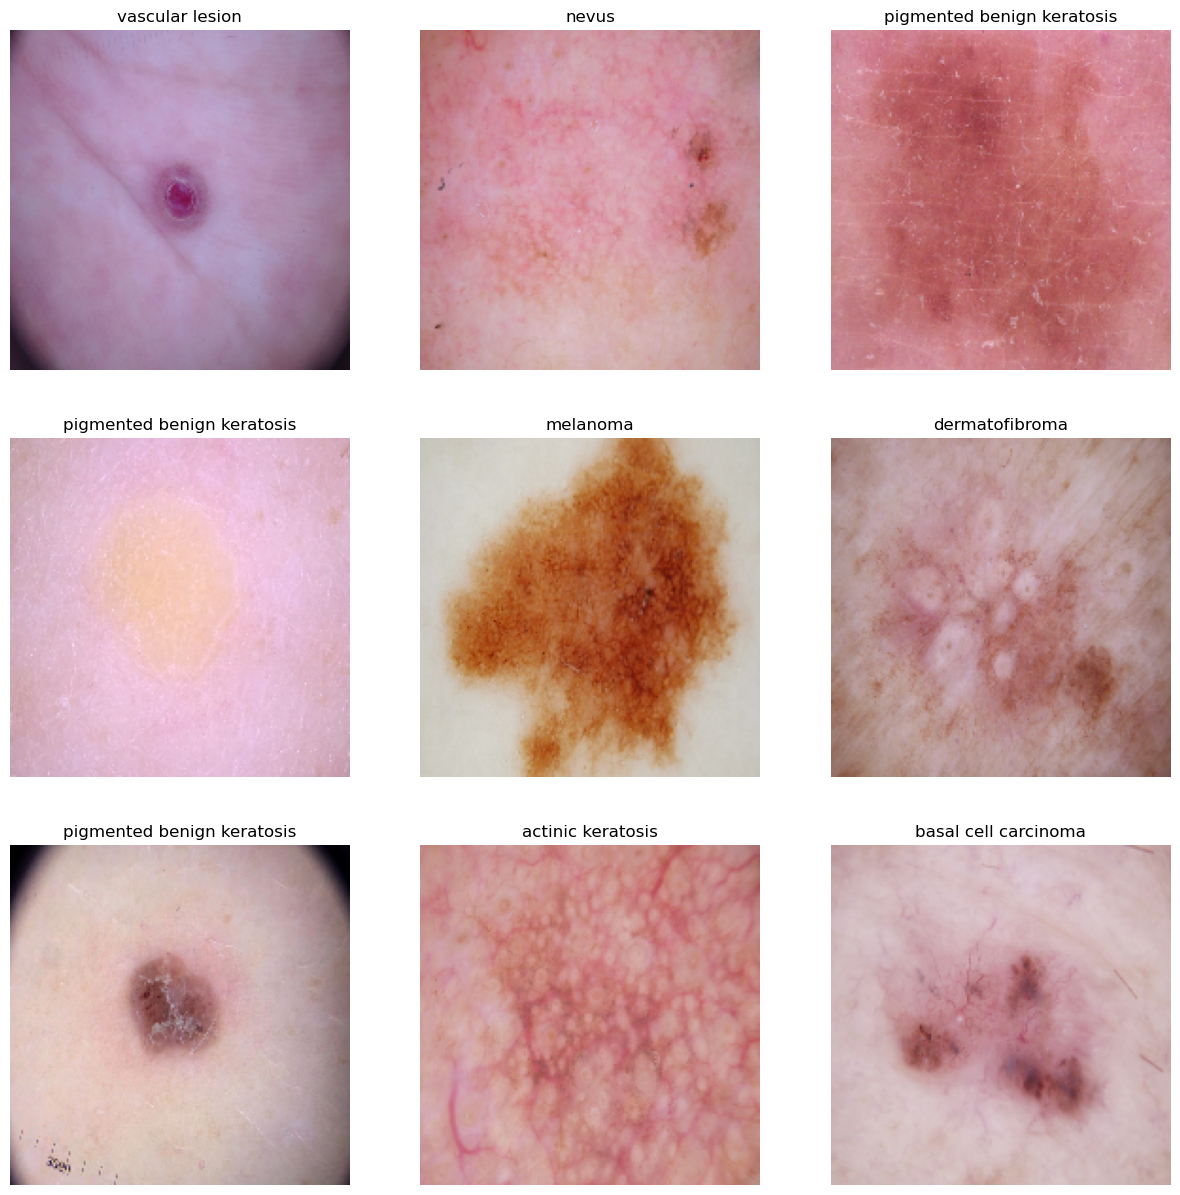

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")




Vallidation  data 


2025-03-18 16:48:32.597187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


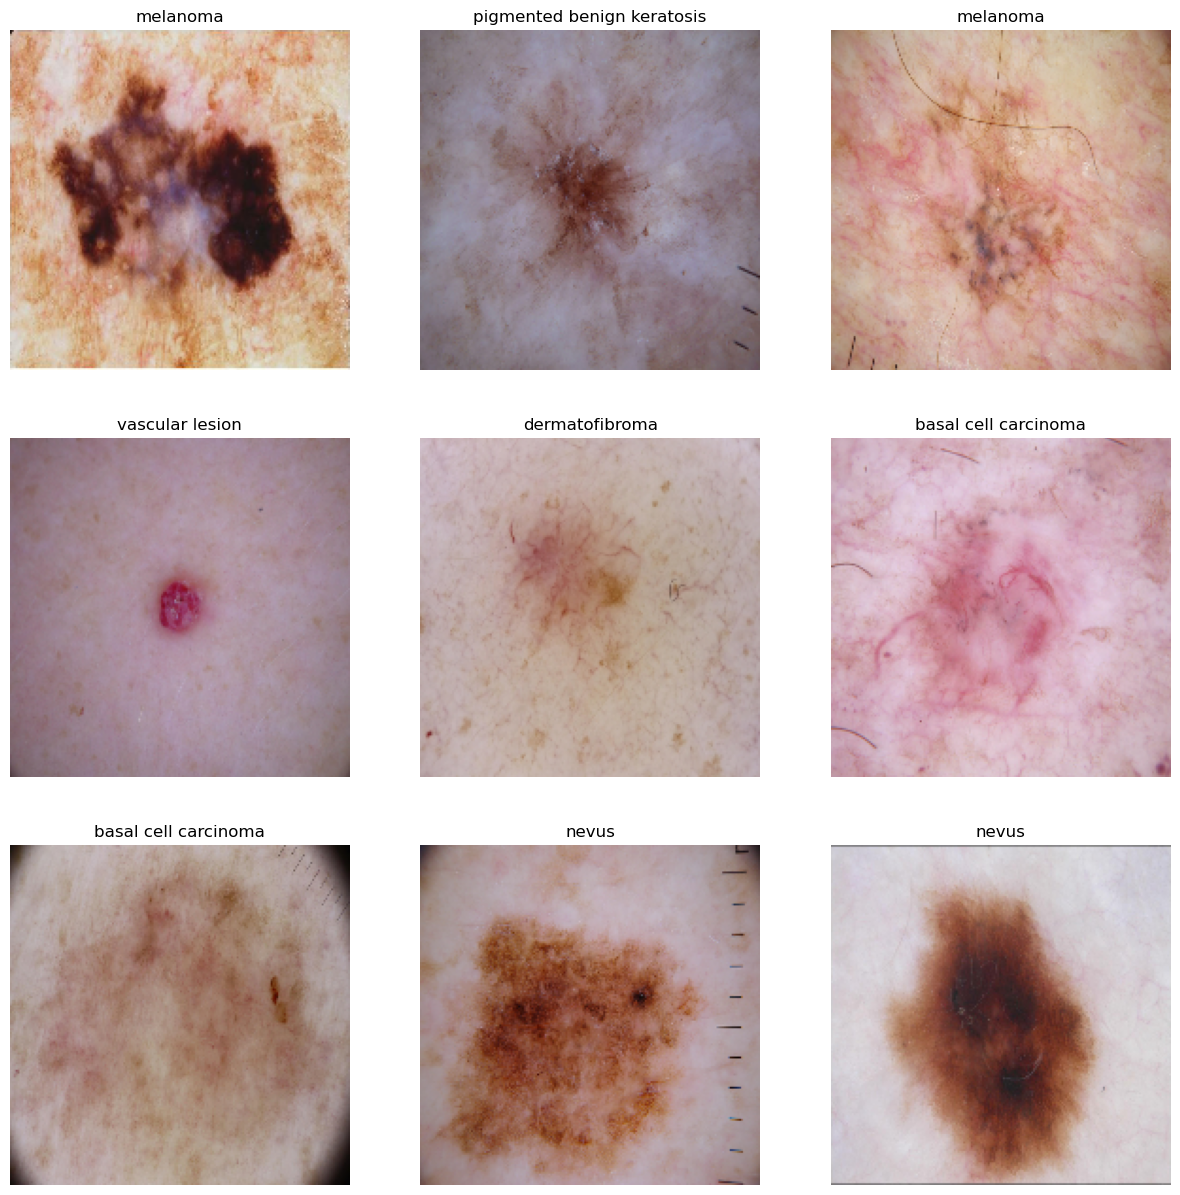

In [73]:

print ( "Vallidation  data ") 
plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [78]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [81]:
### Your code goes here
from tensorflow.keras import layers, models
target_labels=9
model = Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(9, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [84]:
### Todo, choose an appropirate optimiser and loss function


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [86]:
# View the summary of all layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │    16,588,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,609,481 (63.36 MB)

 Trainable params: 16,609,481 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [89]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 709ms/step - accuracy: 0.1625 - loss: 4.8953 - val_accuracy: 0.2349 - val_loss: 1.9913
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 698ms/step - accuracy: 0.2906 - loss: 1.9132 - val_accuracy: 0.4161 - val_loss: 1.7645
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 648ms/step - accuracy: 0.4025 - loss: 1.6535 - val_accuracy: 0.4519 - val_loss: 1.5991
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 633ms/step - accuracy: 0.4955 - loss: 1.4463 - val_accuracy: 0.5347 - val_loss: 1.3845
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 699ms/step - accuracy: 0.5651 - loss: 1.2153 - val_accuracy: 0.5347 - val_loss: 1.4338
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 710ms/step - accuracy: 0.5914 - loss: 1.1530 - val_accuracy: 0.5347 - val_loss: 1.4300
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 696ms/step - accuracy: 0.6264 - loss: 1.0606 - val_accuracy: 0.4720 - val_loss: 1.5884
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 694ms/step - accuracy: 0.6642 - loss: 0.9425 - val_accu

### Visualizing training results

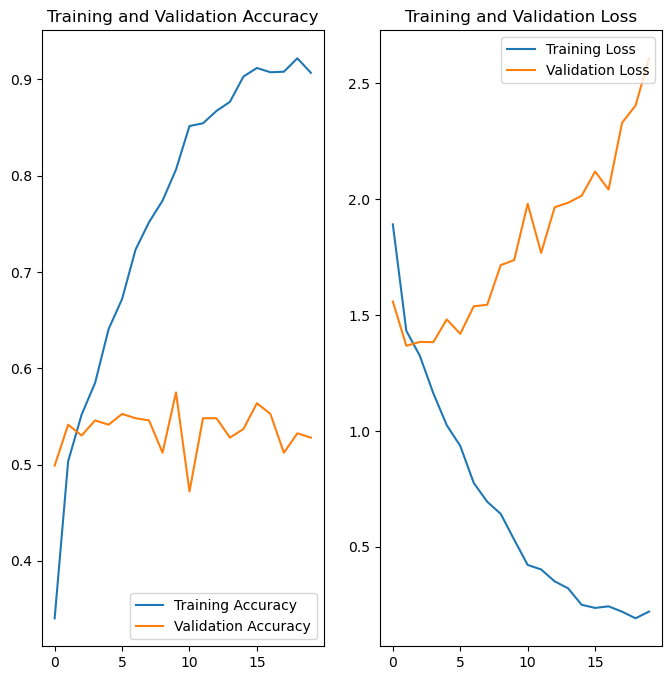

In [415]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [417]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
import tensorflow as tf
from tensorflow.keras import layers

# Define image augmentation pipeline
augmentation_data = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

2025-03-17 21:45:06.552333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


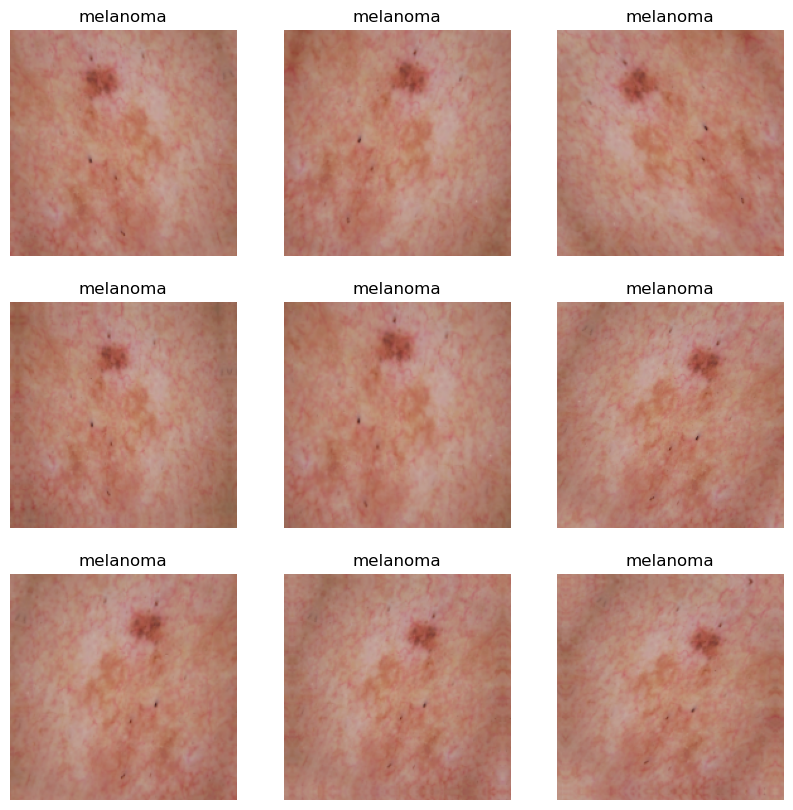

In [419]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")



### Todo:
### Create the model, compile and train the model


In [421]:
## You can use Dropout layer if there is an evidence of overfitting in your findingsmodel = Sequential([
  augmentation_data,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dropout(0.25),
  layers.Dense(target_labels,activation='softmax')
])
model.summary()



Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_34 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_32 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [423]:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [425]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 404ms/step - accuracy: 0.2254 - loss: 2.1967 - val_accuracy: 0.3177 - val_loss: 1.9454
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step - accuracy: 0.3654 - loss: 1.7651 - val_accuracy: 0.4161 - val_loss: 1.6815
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 399ms/step - accuracy: 0.4243 - loss: 1.6368 - val_accuracy: 0.4609 - val_loss: 1.5598
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 400ms/step - accuracy: 0.4792 - loss: 1.4999 - val_accuracy: 0.4765 - val_loss: 1.5473
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 396ms/step - accuracy: 0.4867 - loss: 1.4590 - val_accuracy: 0.5302 - val_loss: 1.3593
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 446ms/step - accuracy: 0.4792 - loss: 1.4338 - val_accuracy: 0.5056 - val_loss: 1.3897
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 521ms/step - accuracy: 0.4832 - loss: 1.3689 - val_accuracy: 0.5056 - val_loss: 1.3905
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 477ms/step - accuracy: 0.5369 - loss: 1.2914 - val_accu

### Visualizing the results

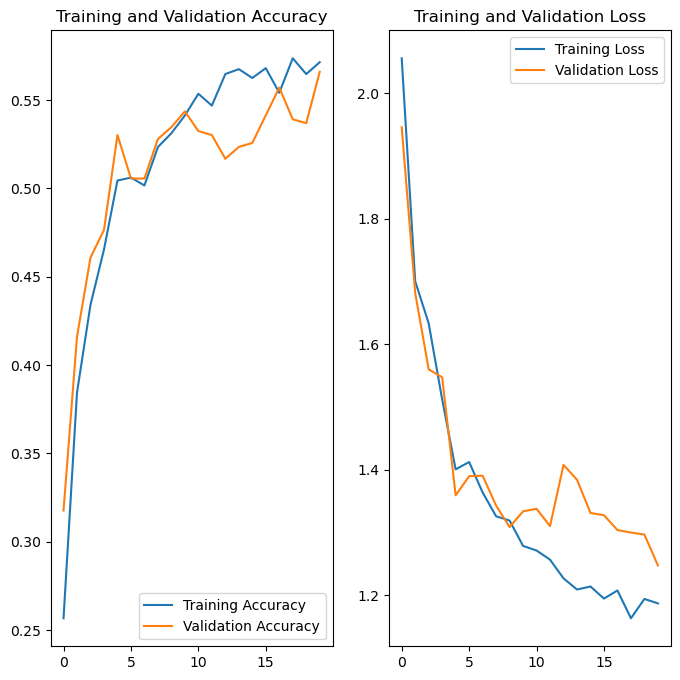

In [427]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### <font color='blue'> -  After using data augumentation and dropout layer overfitting issue is reduce.
#### <font color='blue'> - Model Performance is still not increased. Will check the distribution of classes in the training set to check is there have class imbalance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [456]:
## Your code goes here.
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df



Class  No. of Image
0                    melanoma           438
1  pigmented benign keratosis           462
2                       nevus           357
3        basal cell carcinoma           376
4           actinic keratosis           114
5     squamous cell carcinoma           181
6             vascular lesion           139
7        seborrheic keratosis            77
8              dermatofibroma            95

<Axes: xlabel='No. of Image', ylabel='Class'>

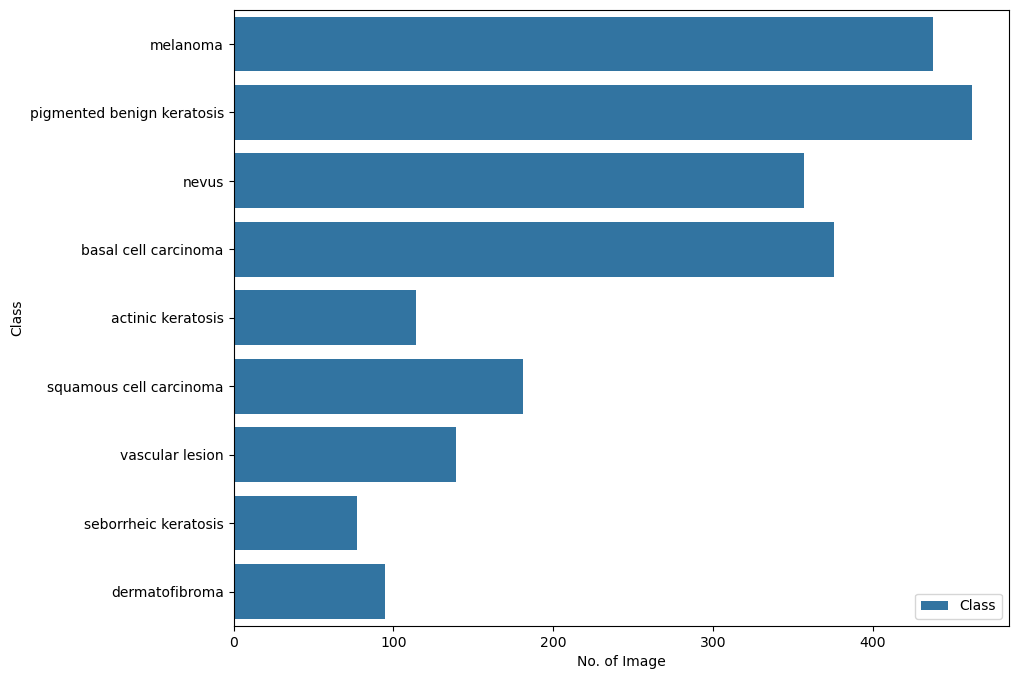

In [454]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


- <font color = "blue">seborrheic keratosis	77
classes have least number of samples 



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [461]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [469]:
path_to_training_dataset="/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x170DC4980>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Initialised with 95 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x171C93440>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1772E01A0>: 100%|█


Initialised with 357 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x1772B6180>: 100%|█|


Initialised with 462 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17736E540>: 100%|█|


Initialised with 77 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 181 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x175EF98E0>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [471]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [475]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000517.jpg_ca227a9b-4d96-426c-86f7-09e438919ce2.jpg',
 '/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011043.jpg_9f5d5148-bc3a-4990-a67e-9de22073e1b1.jpg',
 '/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/melanoma/output/melanoma_original_ISIC_0009886.jpg_5f515b42-8bfd-4ef0-96cc-2494b764e2dc.jpg',
 '/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010749.jpg_9fb16413-5bbd-4904-99db-1a2121a3ba70.jpg',
 '/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/melanoma/output/melanoma

In [535]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [537]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [539]:
df2= pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [541]:
df2['Label'].value_counts()

Label
melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [545]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [580]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),
  label_mode='int', # means that the labels are encoded as a categorical vector 
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [582]:
data_dir_train="/Users/vijayitaazad/Desktop/IIIB/NN/Cnn/Case_Study /Skin_cancer_ISIC_The_Internation_Skin_Imaging_Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  label_mode='int',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [27]:
model3 = Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32,kernel_size=(2,2),activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(2,2),activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128,kernel_size=(2,2),activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(512,activation=tf.nn.relu),
    layers.Dropout(0.25),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dropout(0.50),
    layers.Dense(target_labels,activation='softmax')])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,588,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,828,445 (190.08 MB)

 Trainable params: 16,609,481 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,218,964 (126.72 MB)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [32]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# ModelCheckpoint callback is employed alongside the model.fit() training process to periodically save the model
# or its weights (in a checkpoint file)
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early stop the training when a monitored metric ceases to show improvement
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

#### **Todo:**  Train your model

In [37]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 898ms/step - accuracy: 0.1523 - loss: 2.6849 - val_accuracy: 0.3007 - val_loss: 1.8990
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 957ms/step - accuracy: 0.3156 - loss: 1.8182 - val_accuracy: 0.4254 - val_loss: 1.4965
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 150s 888ms/step - accuracy: 0.4112 - loss: 1.5816 - val_accuracy: 0.4826 - val_loss: 1.4539
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 859ms/step - accuracy: 0.4495 - loss: 1.4424 - val_accuracy: 0.5397 - val_loss: 1.2281
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 855ms/step - accuracy: 0.4907 - loss: 1.3524 - val_accuracy: 0.5687 - val_loss: 1.1300
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 856ms/step - accuracy: 0.5839 - loss: 1.1127 - val_accuracy: 0.5479 - val_loss: 1.1750
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 146s 861ms/step - accuracy: 0.6034 - loss: 1.0545 - val_accuracy: 0.6303 - val_loss: 0.9754
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 147s 872ms/step - accuracy: 0.6698 -

#### **Todo:**  Visualize the model results

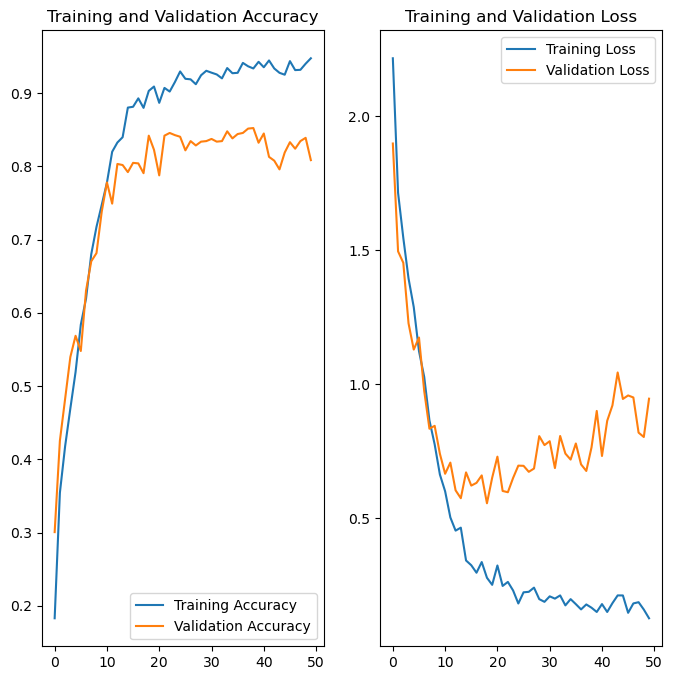

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Evaluation on test data 

In [41]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,    # Directory for test data
  seed=123,
  image_size=(img_height, img_width),  # Same image size as training data
  label_mode='int',  # Same label mode as training data
  batch_size=batch_size)


Found 118 files belonging to 9 classes.


In [43]:
# Evaluating the model on the test dataset
test_loss, test_acc = model3.evaluate(test_ds)

# Output the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.3827 - loss: 6.5184
Test Loss: 6.934808254241943
Test Accuracy: 0.347457617521286
